In [1]:
from helpers import * 

plt.rcParams["figure.figsize"] = (20,4)

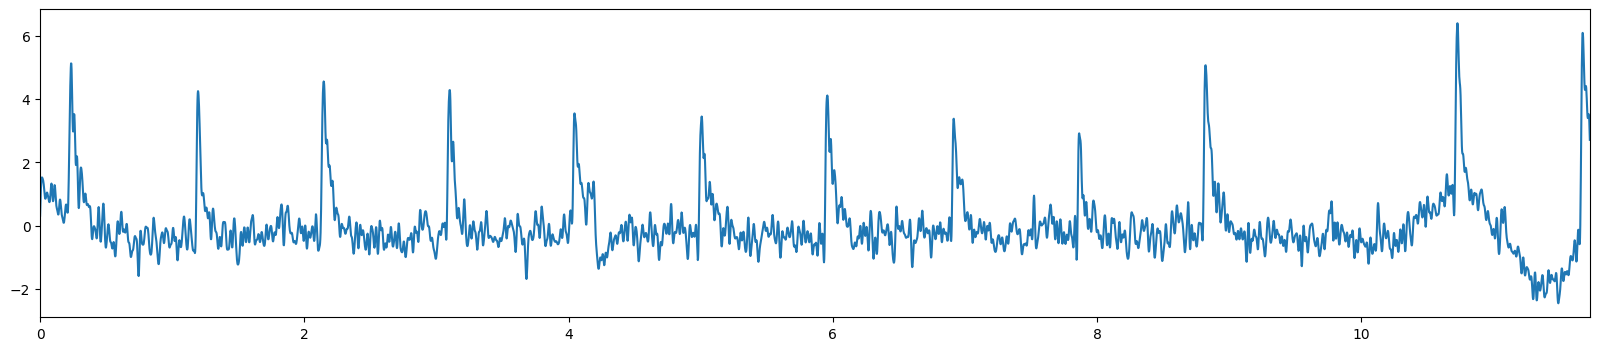

In [2]:
# A sample signal

raw_data = extract_files_data()
sample = raw_data[0]['data']
sample_sf = raw_data[0]['sf']

s = EEGSignal(sample, sample_sf)
s.preview()

[(0, 256), (512, 768), (1024, 1280), (1433, 1689), (1945, 2099), (2457, 2713), (2764, 2918), (2969, 3225), (3481, 3635), (3788, 4147), (4403, 4761), (5427, 5990)]


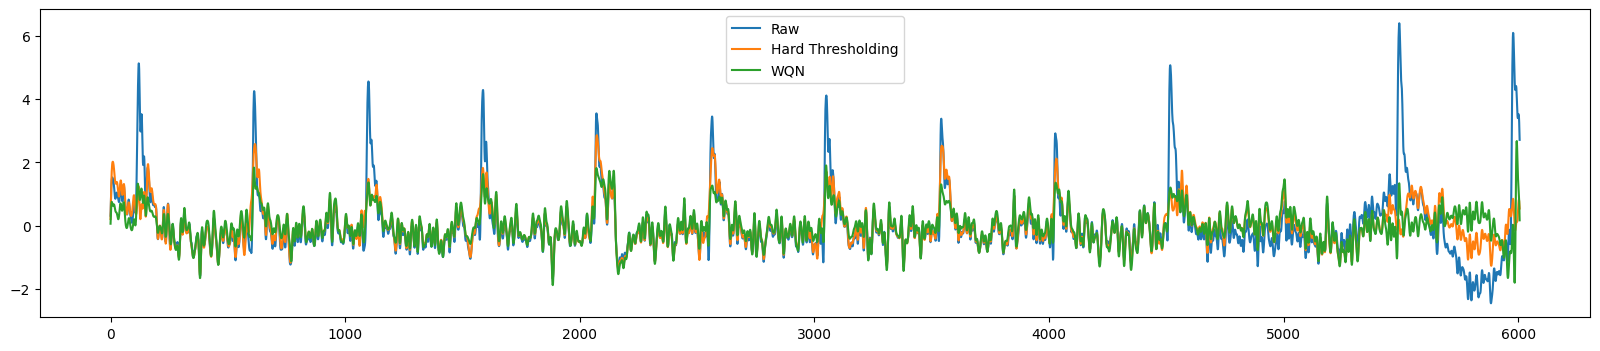

In [4]:
# Artifact Detection and Removal


from detection import ArtifactSVC
from correction import WaveletQuantileNormalization, WaveletThresholding

filename = "models/my_model.pickle"

m = ArtifactSVC(windowSize=0.3, stepSize=0.2)
m.load_model(filename)
artifacts = m.get_arifacted_intervals(s, s.sf)

print(artifacts)
wqn = WaveletQuantileNormalization()
wqnCorrected = wqn.run(s.sig, artifacts)

wT = WaveletThresholding()
wTCorrected = wT.run(s.sig, artifacts)

wqnCorrected = EEGSignal(wqnCorrected, 512)
wTCorrected = EEGSignal(wTCorrected, 512)

wqnC, wqnov = find_scaling_coeff(s.sig, wqnCorrected.sig, (0.1, 1.4))
wTC, wTov = find_scaling_coeff(s.sig, wTCorrected.sig, (0.1, 1.4))

plt.plot(s.sig, label = 'Raw')
plt.plot(wTCorrected.sig*wTC, label = 'Hard Thresholding')
plt.plot(wqnCorrected.sig*wqnC, label = 'WQN')
plt.legend()